<a href="https://colab.research.google.com/github/agmbuwih/Exploring_SQL_Tableau/blob/main/Predicting_yield.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

In [ ]:
data = pd.read_csv('/content/Crop_Yield_Prediction.csv')
data

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop,Yield
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice,7000
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice,5000
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice,7000
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice,7000
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice,120000
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,Coffee,1000
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,Coffee,800
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,Coffee,560
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,Coffee,1500


In [ ]:
data.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop,Yield
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice,7000
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice,5000
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice,7000
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice,7000
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice,120000


In [ ]:
data.tail()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop,Yield
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,Coffee,1000
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,Coffee,800
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,Coffee,560
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,Coffee,1500
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,Coffee,1400


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH_Value     2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   Crop         2200 non-null   object 
 8   Yield        2200 non-null   int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 154.8+ KB


In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data.describe()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Yield
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,2689.228182
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,3710.361267
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,2.000000
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,950.000000
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,1825.000000
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,3500.000000
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117,120000.000000


In [ ]:
missing_values = data.isnull().sum()
missing_values

,0
Nitrogen,0
Phosphorus,0
Potassium,0
Temperature,0
Humidity,0
pH_Value,0
Rainfall,0
Crop,0
Yield,0


In [ ]:
data.nunique()

,0
Nitrogen,137
Phosphorus,117
Potassium,73
Temperature,2200
Humidity,2200
pH_Value,2200
Rainfall,2200
Crop,22
Yield,502


In [ ]:
data['Crop'].unique()

array(['Rice', 'Maize', 'ChickPea', 'KidneyBeans', 'PigeonPeas',
       'MothBeans', 'MungBean', 'Blackgram', 'Lentil', 'Pomegranate',
       'Banana', 'Mango', 'Grapes', 'Watermelon', 'Muskmelon', 'Apple',
       'Orange', 'Papaya', 'Coconut', 'Cotton', 'Jute', 'Coffee'],
      dtype=object)

In [ ]:
crop_average = pd.pivot_table(data, index=['Crop'], aggfunc='mean')
crop_average

,Humidity,Nitrogen,Phosphorus,Potassium,Rainfall,Temperature,Yield,pH_Value
Crop,,,,,,,,
Apple,92.333383,20.80,134.22,199.89,112.654779,22.630942,1704.25,5.929663
Banana,80.358123,100.23,82.01,50.05,104.626980,27.376798,2377.09,5.983893
Blackgram,65.118426,40.02,67.47,19.24,67.884151,29.973340,2131.43,7.133952
ChickPea,16.860439,40.09,67.79,79.92,80.058977,18.872847,2531.26,7.336957
Coconut,94.844272,21.98,16.93,30.59,175.686646,27.409892,2550.84,5.976562
Coffee,58.869846,101.20,28.74,29.94,158.066295,25.540477,2638.90,6.790308
Cotton,79.843474,117.77,46.24,19.56,80.398043,23.988958,1411.05,6.912675
Grapes,81.875228,23.18,132.53,200.11,69.611829,23.849575,2840.35,6.025937
Jute,79.639864,78.40,46.86,39.99,174.792798,24.958376,1789.90,6.732778


In [ ]:
crop_average_new = crop_average.reset_index()
crop_average_new

,Crop,Humidity,Nitrogen,Phosphorus,Potassium,Rainfall,Temperature,Yield,pH_Value
0,Apple,92.333383,20.80,134.22,199.89,112.654779,22.630942,1704.25,5.929663
1,Banana,80.358123,100.23,82.01,50.05,104.626980,27.376798,2377.09,5.983893
2,Blackgram,65.118426,40.02,67.47,19.24,67.884151,29.973340,2131.43,7.133952
3,ChickPea,16.860439,40.09,67.79,79.92,80.058977,18.872847,2531.26,7.336957
4,Coconut,94.844272,21.98,16.93,30.59,175.686646,27.409892,2550.84,5.976562
5,Coffee,58.869846,101.20,28.74,29.94,158.066295,25.540477,2638.90,6.790308
6,Cotton,79.843474,117.77,46.24,19.56,80.398043,23.988958,1411.05,6.912675
7,Grapes,81.875228,23.18,132.53,200.11,69.611829,23.849575,2840.35,6.025937
8,Jute,79.639864,78.40,46.86,39.99,174.792798,24.958376,1789.90,6.732778
9,KidneyBeans,21.605357,20.75,67.54,20.05,105.919778,20.115085,3161.20,5.749411


In [ ]:
data1 = data[['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity', 'pH_Value', 'Rainfall']]

Visualisation

Bar Plot

/tmp/ipython-input-4089640107.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Crop', y = i, data = crop_average_new, palette = 'mako')


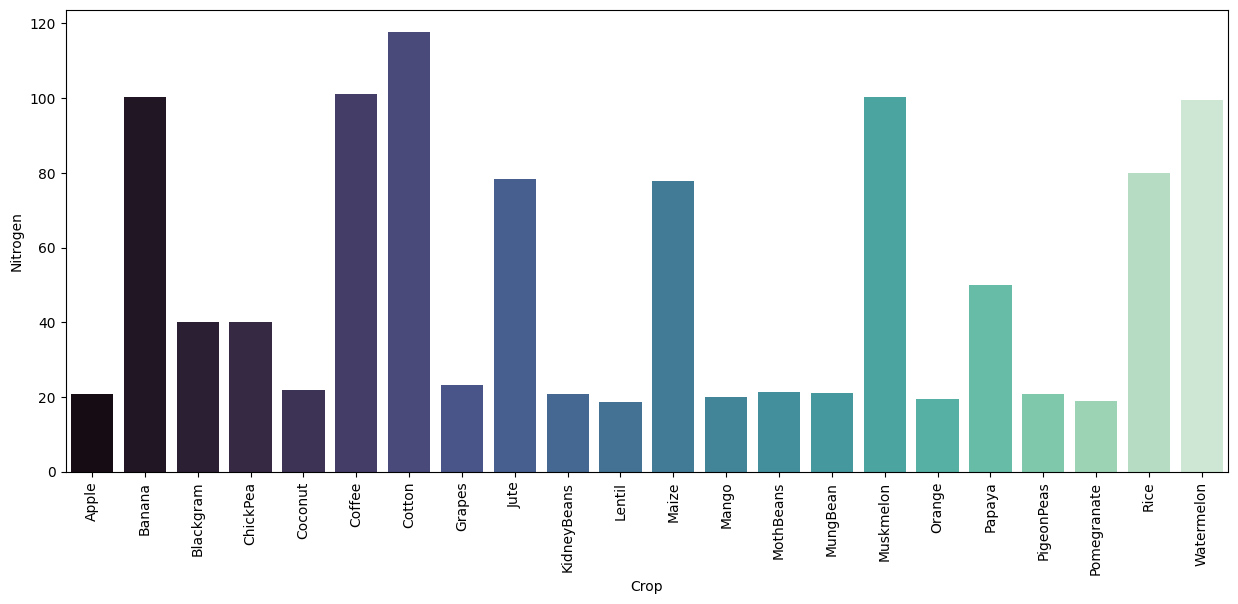

/tmp/ipython-input-4089640107.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Crop', y = i, data = crop_average_new, palette = 'mako')


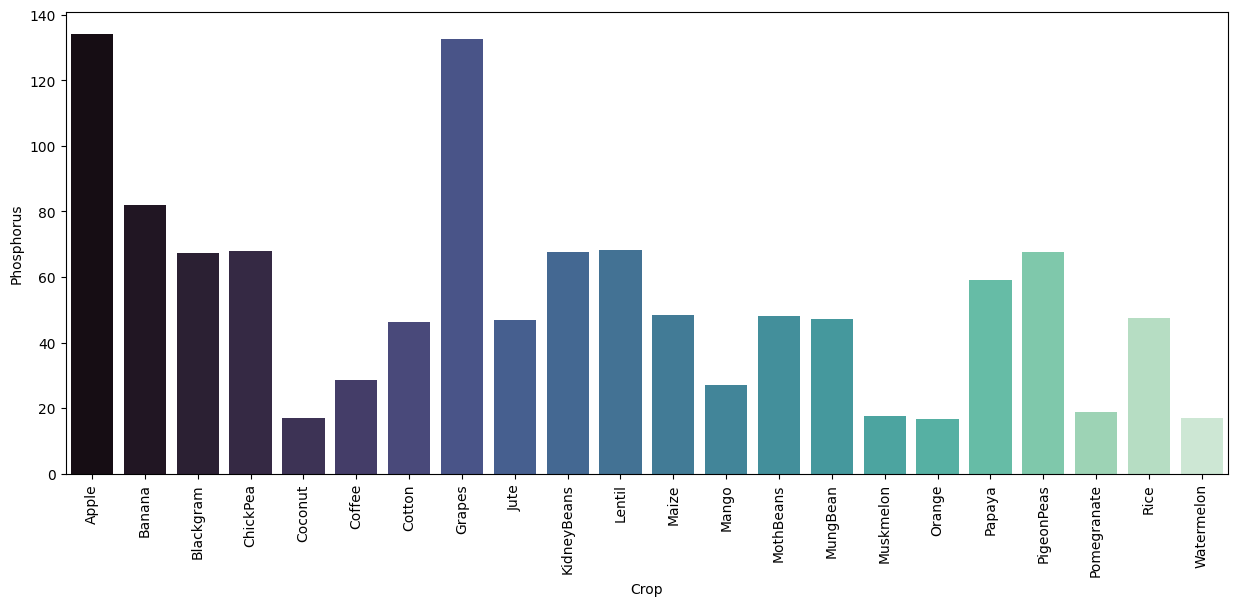

/tmp/ipython-input-4089640107.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Crop', y = i, data = crop_average_new, palette = 'mako')


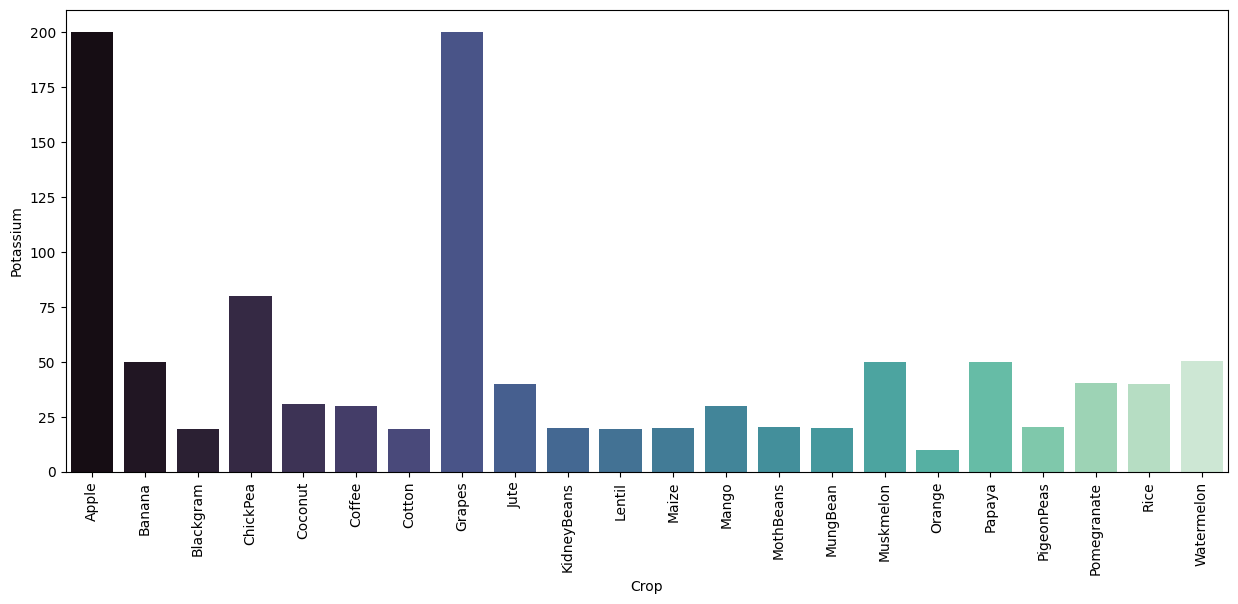

/tmp/ipython-input-4089640107.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Crop', y = i, data = crop_average_new, palette = 'mako')


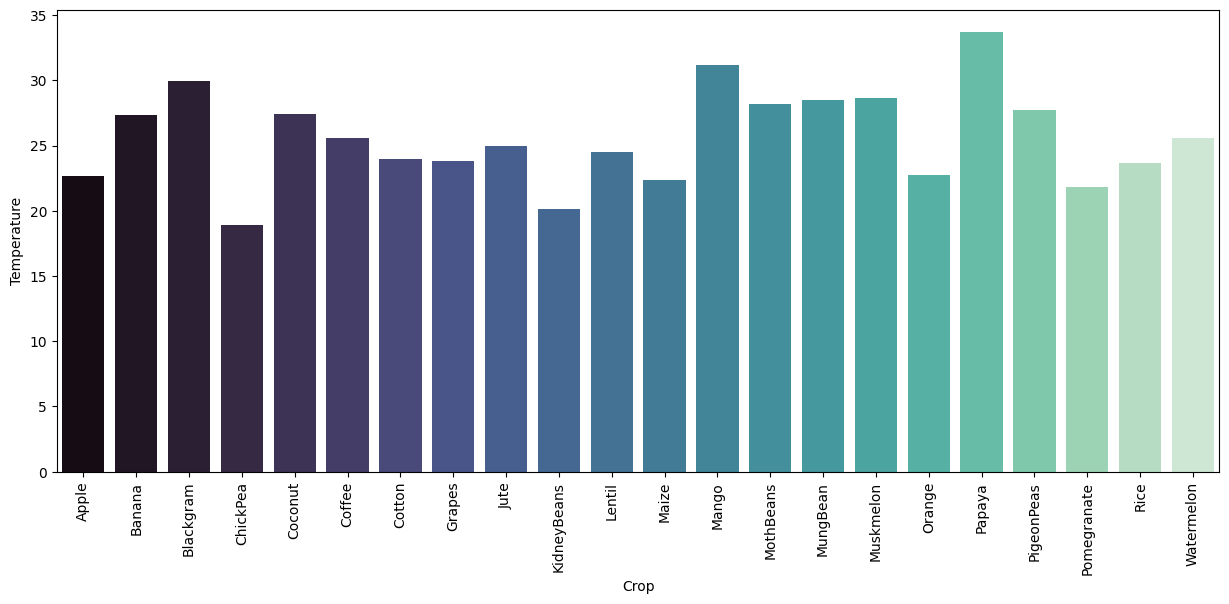

/tmp/ipython-input-4089640107.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Crop', y = i, data = crop_average_new, palette = 'mako')


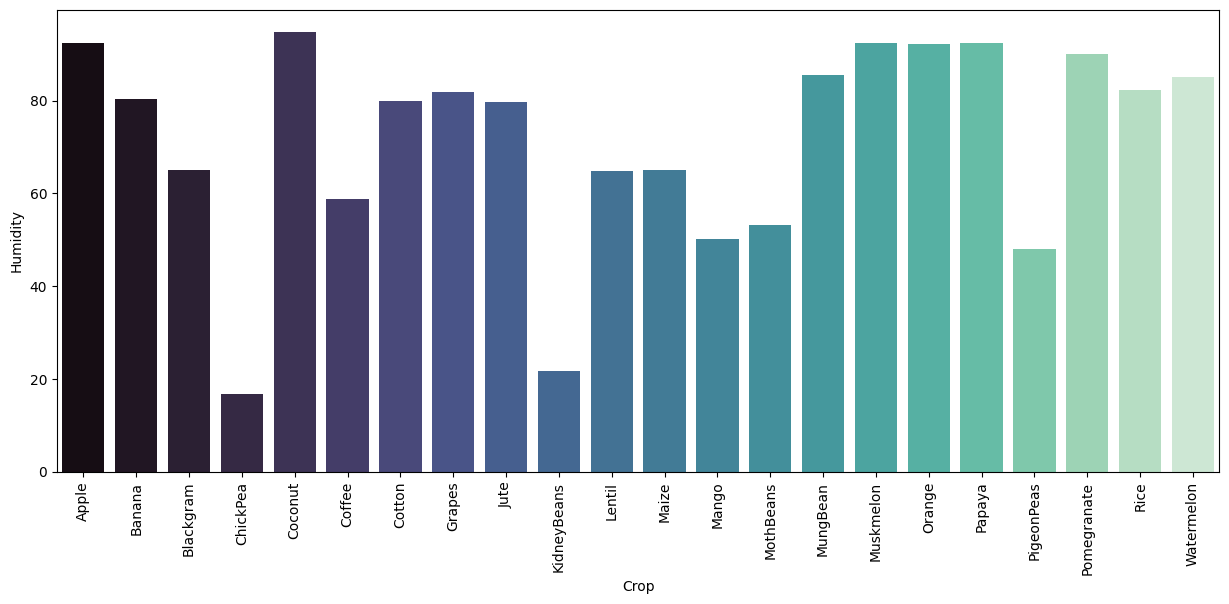

/tmp/ipython-input-4089640107.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Crop', y = i, data = crop_average_new, palette = 'mako')


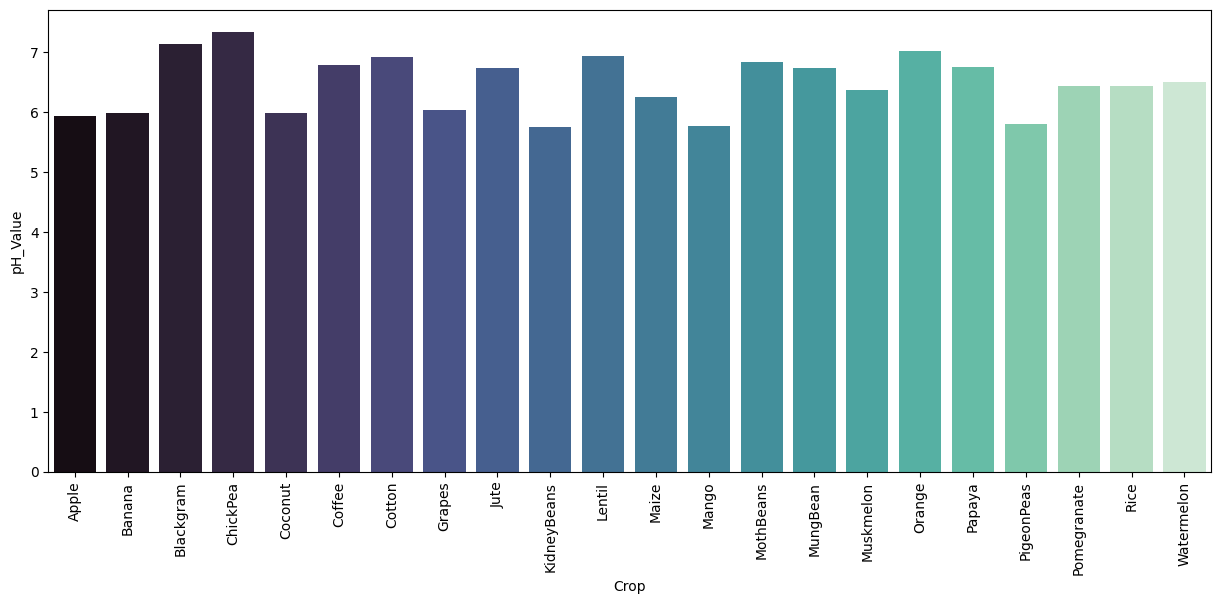

/tmp/ipython-input-4089640107.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Crop', y = i, data = crop_average_new, palette = 'mako')


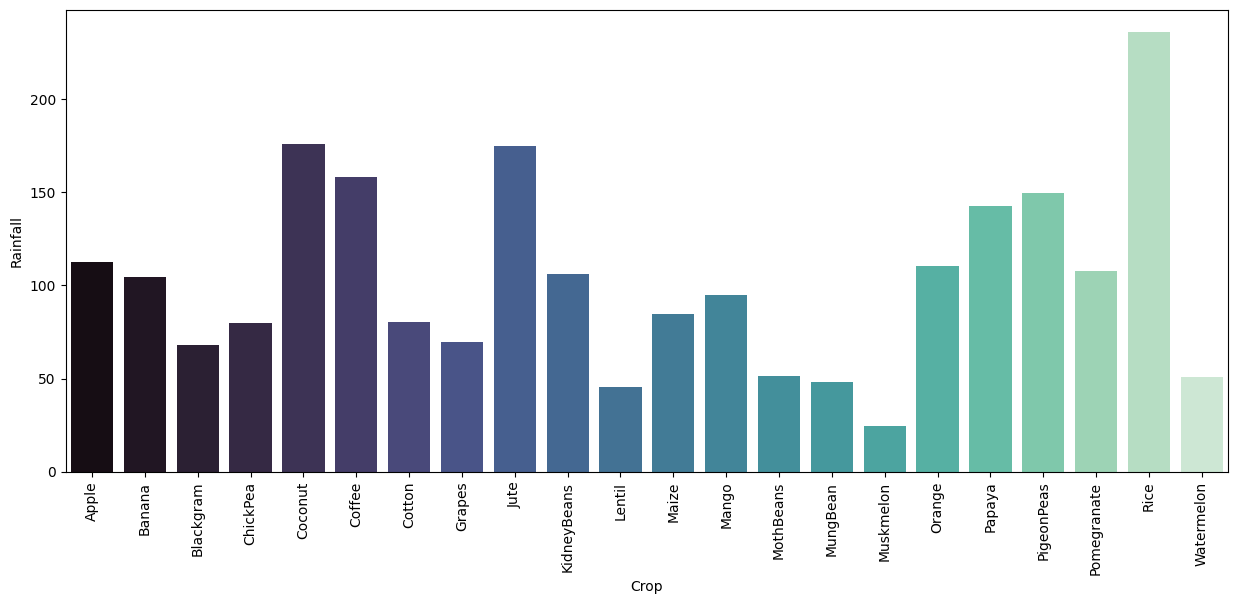

In [ ]:
for i in data1.columns:


    plt.figure(figsize = (15, 6))


    sns.barplot(x = 'Crop', y = i, data = crop_average_new, palette = 'mako')


    plt.xticks(rotation = 90)


    plt.show()


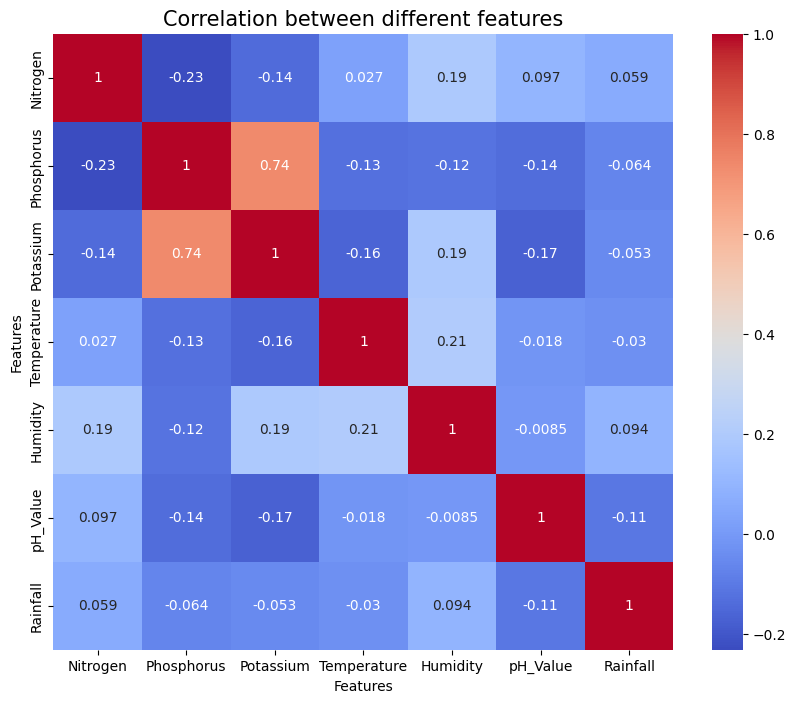

In [ ]:
data1.corr()
# calculates the pairwise correlation of columns in the dataframe df1.

fig, ax = plt.subplots(1, 1, figsize = (10,8))
# creates a matplotlib figure (fig) and axis (ax) with a size of 9 inches by 9 inches for the heatmap.

sns.heatmap(data1.corr(), annot = True, cmap = 'coolwarm')
# generates a heatmap using Seaborn's heatmap function.
# It uses the correlation matrix (data.corr()) as the data.
# The annot=True argument displays the correlation values inside the heatmap cells.
# cmap='Wistia' sets the color scheme to 'Wistia'.

ax.set(xlabel = 'Features')
ax.set(ylabel = 'Features')
# sets the x-axis and y-axis labels of the heatmap to 'Features'.

plt.title('Correlation between different features', fontsize=15, color='black', loc='center')
# sets the title of the plot to 'Correlation between different features' with a font size of 15
# sets the title of the plot to 'Correlation between different features' with a font size of 15 and black color.

plt.show()
# displays the heatmap plot.

**Regression pipeline for crop yields**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import make_pipeline
# from sklearn import set_config
from sklearn.preprocessing import StandardScaler

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder,MinMaxScaler

#regressionmodels
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

#metrics for measuring performance
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, mean_absolute_percentage_error, r2_score

In [ ]:
data = pd.read_csv('/content/Crop_Yield_Prediction.csv')
data

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop,Yield
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice,7000
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice,5000
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice,7000
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice,7000
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice,120000
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,Coffee,1000
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,Coffee,800
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,Coffee,560
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,Coffee,1500


In [ ]:
data['Crop'].unique()

array(['Rice', 'Maize', 'ChickPea', 'KidneyBeans', 'PigeonPeas',
       'MothBeans', 'MungBean', 'Blackgram', 'Lentil', 'Pomegranate',
       'Banana', 'Mango', 'Grapes', 'Watermelon', 'Muskmelon', 'Apple',
       'Orange', 'Papaya', 'Coconut', 'Cotton', 'Jute', 'Coffee'],
      dtype=object)

In [ ]:
df = pd.pivot_table(data, index=['Crop'], aggfunc='mean')
df

,Humidity,Nitrogen,Phosphorus,Potassium,Rainfall,Temperature,Yield,pH_Value
Crop,,,,,,,,
Apple,92.333383,20.80,134.22,199.89,112.654779,22.630942,1704.25,5.929663
Banana,80.358123,100.23,82.01,50.05,104.626980,27.376798,2377.09,5.983893
Blackgram,65.118426,40.02,67.47,19.24,67.884151,29.973340,2131.43,7.133952
ChickPea,16.860439,40.09,67.79,79.92,80.058977,18.872847,2531.26,7.336957
Coconut,94.844272,21.98,16.93,30.59,175.686646,27.409892,2550.84,5.976562
Coffee,58.869846,101.20,28.74,29.94,158.066295,25.540477,2638.90,6.790308
Cotton,79.843474,117.77,46.24,19.56,80.398043,23.988958,1411.05,6.912675
Grapes,81.875228,23.18,132.53,200.11,69.611829,23.849575,2840.35,6.025937
Jute,79.639864,78.40,46.86,39.99,174.792798,24.958376,1789.90,6.732778


In [ ]:
data.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop,Yield
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice,7000
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice,5000
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice,7000
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice,7000
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice,120000


In [ ]:
X = data.drop('Yield', axis=1)
y = data['Yield']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model_scores = []
def score_model(model_name, y_true, y_pred):
  scores = {
      'Model': model_name,
      'MAE ()': round(mean_absolute_error(y_true, y_pred), 2),
      'RMSE ()': round(root_mean_squared_error(y_true, y_pred), 2),
      'MAPE (%)': round(100 * mean_absolute_percentage_error(y_true, y_pred), 2),
      'R-Squared': round(r2_score(y_true, y_pred), 3)
  }
  return scores

In [ ]:
data.select_dtypes(include='number').columns

Index(['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity',
       'pH_Value', 'Rainfall', 'Yield'],
      dtype='object')

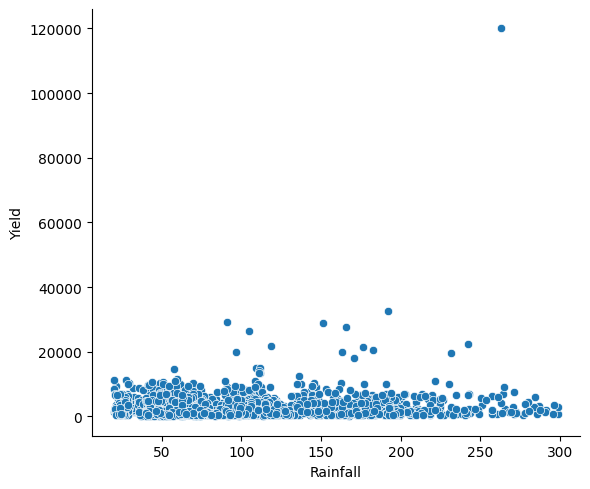

In [ ]:
sns.relplot(data = data,
              x='Rainfall',
              y='Yield',
              height=5,
              aspect=1.2)

In [ ]:
baseline_pred = y_train.mean()
baseline_preds = pd.Series([baseline_pred] * len(y_test))

baseline_preds

,0
0,2702.844318
1,2702.844318
2,2702.844318
3,2702.844318
4,2702.844318
...,...
435,2702.844318
436,2702.844318
437,2702.844318
438,2702.844318


In [ ]:
model_scores.append(score_model('dummy', y_test, baseline_preds))

pd.DataFrame(model_scores)

,Model,MAE (),RMSE (),MAPE (%),R-Squared
0,dummy,1805.87,2616.8,929.46,-0.001


In [ ]:
# Select categorical and numeric columns
X_cat = X.select_dtypes(exclude="number").copy()
X_num = X.select_dtypes(include="number").copy()

# Numeric pipeline to impute missing values
numeric_pipe = make_pipeline(
    SimpleImputer(strategy="mean"),
    StandardScaler()
)

# Categoric pipeline (OneHot)
categoric_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="N_A"),
    OneHotEncoder(handle_unknown="ignore", sparse_output=False)
)

# now put everything together in a columntransformer

preprocessor = make_column_transformer(
    # each step is passed in a tuple seperated by comma ;)
    (numeric_pipe, X_num.columns),
    (categoric_pipe, X_cat.columns)
)

preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity',
       'pH_Value', 'Rainfall'],
      dtype='object')),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='N_A',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Crop'], dtype='object'))])

In [ ]:
dt_pipe = make_pipeline(preprocessor,
                        DecisionTreeRegressor())

dt_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity',
       'pH_Value', 'Rainfall'],
      dtype='object')),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='N_A',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Crop'], dtype='object'))])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [ ]:
dt_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity',
       'pH_Value', 'Rainfall'],
      dtype='object')),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='N_A',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Crop'], dtype='object'))])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [ ]:
dt_predictions = dt_pipe.predict(X_test)

In [ ]:
model_scores.append(score_model('decision tree', y_test, dt_predictions))

pd.DataFrame(model_scores)

,Model,MAE (),RMSE (),MAPE (%),R-Squared
0,dummy,1805.87,2616.80,929.46,-0.001
1,decision tree,2643.43,4261.07,681.76,-1.653


In [ ]:
knn_pipe = make_pipeline(preprocessor,
                         KNeighborsRegressor())

knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity',
       'pH_Value', 'Rainfall'],
      dtype='object')),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='N_A',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Crop'], dtype='object'))])),
                ('kneighborsregressor', KNeighborsRegressor())])

In [ ]:
knn_predictions = dt_pipe.predict(X_test)

In [ ]:
model_scores.append(score_model('KNN_scaled', y_test, knn_predictions))

pd.DataFrame(model_scores)

,Model,MAE (),RMSE (),MAPE (%),R-Squared
0,dummy,1805.87,2616.80,929.46,-0.001
1,decision tree,2643.43,4261.07,681.76,-1.653
2,KNN_scaled,2643.43,4261.07,681.76,-1.653


In [ ]:
rf_pipe = make_pipeline(preprocessor,
                        RandomForestRegressor())

rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity',
       'pH_Value', 'Rainfall'],
      dtype='object')),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='N_A',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Crop'], dtype='object'))])),
                ('randomforestregressor', RandomForestRegressor())])

In [ ]:
rf_preds = rf_pipe.predict(X_test)

In [ ]:
model_scores.append(score_model('rf_scaled', y_test, rf_preds))

pd.DataFrame(model_scores)

,Model,MAE (),RMSE (),MAPE (%),R-Squared
0,dummy,1805.87,2616.80,929.46,-0.001
1,decision tree,2643.43,4261.07,681.76,-1.653
2,KNN_scaled,2643.43,4261.07,681.76,-1.653
3,rf_scaled,1902.18,2813.08,898.72,-0.156


In [ ]:
lr_pipe = make_pipeline(preprocessor,
                        LinearRegression())

lr_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity',
       'pH_Value', 'Rainfall'],
      dtype='object')),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='N_A',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Crop'], dtype='object'))])),
                ('linearregression', LinearRegression())])

In [ ]:
lr_preds = lr_pipe.predict(X_test)

In [ ]:
model_scores.append(score_model('lr_scaled', y_test, lr_preds))

pd.DataFrame(model_scores)

,Model,MAE (),RMSE (),MAPE (%),R-Squared
0,dummy,1805.87,2616.80,929.46,-0.001
1,decision tree,2643.43,4261.07,681.76,-1.653
2,KNN_scaled,2643.43,4261.07,681.76,-1.653
3,rf_scaled,1902.18,2813.08,898.72,-0.156
4,lr_scaled,1753.13,2547.22,745.81,0.052


In [ ]:
reg_pipe = make_pipeline(preprocessor,
                      GradientBoostingRegressor())

reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity',
       'pH_Value', 'Rainfall'],
      dtype='object')),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='N_A',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Crop'], dtype='object'))])),
                ('gradientboostingregressor', GradientBoostingRegressor())])

In [ ]:
reg_preds = lr_pipe.predict(X_test)

In [ ]:
model_scores.append(score_model('reg_scaled', y_test, lr_preds))

pd.DataFrame(model_scores)

,Model,MAE (),RMSE (),MAPE (%),R-Squared
0,dummy,1805.87,2616.80,929.46,-0.001
1,decision tree,2643.43,4261.07,681.76,-1.653
2,KNN_scaled,2643.43,4261.07,681.76,-1.653
3,rf_scaled,1902.18,2813.08,898.72,-0.156
4,lr_scaled,1753.13,2547.22,745.81,0.052
5,reg_scaled,1753.13,2547.22,745.81,0.052


In [ ]:
lr_pipe.get_params().keys()

dict_keys(['memory', 'steps', 'transform_input', 'verbose', 'columntransformer', 'linearregression', 'columntransformer__force_int_remainder_cols', 'columntransformer__n_jobs', 'columntransformer__remainder', 'columntransformer__sparse_threshold', 'columntransformer__transformer_weights', 'columntransformer__transformers', 'columntransformer__verbose', 'columntransformer__verbose_feature_names_out', 'columntransformer__pipeline-1', 'columntransformer__pipeline-2', 'columntransformer__pipeline-1__memory', 'columntransformer__pipeline-1__steps', 'columntransformer__pipeline-1__transform_input', 'columntransformer__pipeline-1__verbose', 'columntransformer__pipeline-1__simpleimputer', 'columntransformer__pipeline-1__standardscaler', 'columntransformer__pipeline-1__simpleimputer__add_indicator', 'columntransformer__pipeline-1__simpleimputer__copy', 'columntransformer__pipeline-1__simpleimputer__fill_value', 'columntransformer__pipeline-1__simpleimputer__keep_empty_features', 'columntransfor

In [ ]:
param_grid = {
    'linearregression__fit_intercept': [True, False],
    'linearregression__positive': [True, False]
}

In [ ]:
pipeline = make_pipeline(preprocessor,
                         LinearRegression())

pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity',
       'pH_Value', 'Rainfall'],
      dtype='object')),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='N_A',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Crop'], dtype='object'))])),
                ('linearregression', LinearRegression())])

In [ ]:
lr_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

lr_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity',
       'pH_Value', 'Rainfall'],
      dtype='object')),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimput...
                                                                                          SimpleImputer(fill_value='N_A',
                                                                                                        strategy='constant')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         Index(['Crop'], dtype='object'))])),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'linearregression__fit_intercept': [True, False],
                         'linearregression__positive': [True, False]},
             scoring='neg_mean_squared_error')

In [ ]:
lr_preds = lr_search.predict(X_test)

In [ ]:
model_scores.append(score_model('lr_tuned', y_test, lr_preds))

pd.DataFrame(model_scores)

,Model,MAE (),RMSE (),MAPE (%),R-Squared
0,dummy,1805.87,2616.80,929.46,-0.001
1,decision tree,2643.43,4261.07,681.76,-1.653
2,KNN_scaled,2643.43,4261.07,681.76,-1.653
3,rf_scaled,1902.18,2813.08,898.72,-0.156
4,lr_scaled,1753.13,2547.22,745.81,0.052
5,reg_scaled,1753.13,2547.22,745.81,0.052
6,lr_tuned,1739.72,2525.73,757.14,0.068


In [ ]:
predictions = lr_pipe.predict(X_test)
predictions

array([2756.31324531, 3831.91200964, 1417.04449117, 1887.98804599,
       1763.89277574, 1838.56168118, 1656.14252526, 3621.5054371 ,
       2735.07190489, 2183.28432922, 2339.14752468, 2661.64937005,
       3844.79183402, 1743.47727426, 2280.37296732, 3510.8928325 ,
       1760.38688869, 2301.3524674 , 2936.76096665, 2798.16166595,
       2743.76650943, 1511.95791879, 1846.87136475, 2606.62922375,
       2380.99297632, 1746.79804522, 2730.21607824, 1376.10277538,
       5335.78723403, 4897.26722049, 3278.7240195 , 3353.21891579,
       2030.62256701, 1954.12283538, 2088.05478612, 2170.78246579,
       1956.15397102, 2237.20378403, 2343.4417468 , 2881.00202388,
       2986.92839651, 1894.91858656, 2030.58685124, 2353.48417779,
       2910.07669334, 2224.27695351, 4970.91748035, 2504.47823431,
       2624.12117696, 2170.50155771, 2085.52537781, 2213.82630859,
       2802.83815335, 2918.9167021 , 2576.49418866, 3170.80319068,
       1338.41883495, 1655.84296598, 2229.1353231 , 2536.11349

In [ ]:
Crop_column = data['Crop']
Crop_column

,Crop
0,Rice
1,Rice
2,Rice
3,Rice
4,Rice
...,...
2195,Coffee
2196,Coffee
2197,Coffee
2198,Coffee


In [ ]:
crop_test = Crop_column[:len(predictions)]
results = pd.DataFrame({'Crops': crop_test, 'Yields': predictions})
results

,Crops,Yields
0,Rice,2756.313245
1,Rice,3831.912010
2,Rice,1417.044491
3,Rice,1887.988046
4,Rice,1763.892776
...,...,...
435,PigeonPeas,5458.239198
436,PigeonPeas,5452.916307
437,PigeonPeas,1447.127820
438,PigeonPeas,1286.167716


In [ ]:
N = len(predictions)
results = pd.DataFrame({
    'Crop': Crop_column.iloc[:N].values,    # or use appropriate indexing
    'Yield': predictions
})
results

,Crop,Yield
0,Rice,2756.313245
1,Rice,3831.912010
2,Rice,1417.044491
3,Rice,1887.988046
4,Rice,1763.892776
...,...,...
435,PigeonPeas,5458.239198
436,PigeonPeas,5452.916307
437,PigeonPeas,1447.127820
438,PigeonPeas,1286.167716


In [ ]:
results['Yield'].unique()

array([2756.31324531, 3831.91200964, 1417.04449117, 1887.98804599,
       1763.89277574, 1838.56168118, 1656.14252526, 3621.5054371 ,
       2735.07190489, 2183.28432922, 2339.14752468, 2661.64937005,
       3844.79183402, 1743.47727426, 2280.37296732, 3510.8928325 ,
       1760.38688869, 2301.3524674 , 2936.76096665, 2798.16166595,
       2743.76650943, 1511.95791879, 1846.87136475, 2606.62922375,
       2380.99297632, 1746.79804522, 2730.21607824, 1376.10277538,
       5335.78723403, 4897.26722049, 3278.7240195 , 3353.21891579,
       2030.62256701, 1954.12283538, 2088.05478612, 2170.78246579,
       1956.15397102, 2237.20378403, 2343.4417468 , 2881.00202388,
       2986.92839651, 1894.91858656, 2030.58685124, 2353.48417779,
       2910.07669334, 2224.27695351, 4970.91748035, 2504.47823431,
       2624.12117696, 2170.50155771, 2085.52537781, 2213.82630859,
       2802.83815335, 2918.9167021 , 2576.49418866, 3170.80319068,
       1338.41883495, 1655.84296598, 2229.1353231 , 2536.11349

In [ ]:
results = results.sort_values(by='Yield', ascending=False)
results

,Crop,Yield
69,Rice,6056.009773
439,PigeonPeas,5819.258891
108,Maize,5761.427874
94,Rice,5735.989913
252,ChickPea,5733.868234
...,...,...
332,KidneyBeans,1224.220944
296,ChickPea,1104.221457
162,Maize,1023.896398
66,Rice,986.780151


# *Andrii's Code*

Try to apply this function

In [ ]:
from sklearn.metrics import root_mean_squared_log_error

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler,RobustScaler
from sklearn.linear_model import LinearRegression, BayesianRidge, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest, chi2, f_regression
from sklearn.linear_model import SGDRegressor


def score_models(X_train, y_train, X_test, y_test):
  model_scaler = []
  mae = []
  rmse = []
  mape =[]
  r2 = []
  rm2_log = []
  feature_selection = []

  scores_df = {
      "Model_Scaler":model_scaler,
      "Feature Selector": feature_selection,
      'MAE ($)': mae,
      'RMSE ($)': rmse,
      'MAPE (%)': mape,
      'R-Squared': r2,
      "RMea2_log": rm2_log
  }

  # list of necessry scalers
  scalers_list = [MinMaxScaler(), StandardScaler(),RobustScaler()]
  # list of models
  models_list = [LinearRegression(), BayesianRidge(), SGDRegressor(), KNeighborsRegressor(),
                 SVR(),DecisionTreeRegressor(), RandomForestRegressor(),GradientBoostingRegressor()]
  # selectors_list = ["passthrough", VarianceThreshold(threshold=0), VarianceThreshold(threshold=0.2)]
  feature_score = ["all", 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55]

  for i in range(len(models_list)):
    for j in range(len(scalers_list)):
      # for k in range(len(selectors_list)):
        for o in range(len(feature_score)):
          pipeline = make_pipeline(
            preprocessor,
            scalers_list[j],
            # selectors_list[k],
            SelectKBest(score_func=f_regression, k=feature_score[o]),
            models_list[i]
          )
          pipeline.fit(X_train, y_train)
          # if (round(r2_score(y_test, pipeline.predict(X_test)), 2)) > 0.65:
          model_scaler.append(f"{models_list[i]} {scalers_list[j]}")
          feature_selection.append(feature_score[o])
          mae.append(str(round(mean_absolute_error(y_test, pipeline.predict(X_test)), 2)))
          rmse.append(str(round(root_mean_squared_error(y_test, pipeline.predict(X_test)), 2)))
          mape.append(str(round(100 * mean_absolute_percentage_error(y_test, pipeline.predict(X_test)), 2)))
          r2.append(str(round(r2_score(y_test, pipeline.predict(X_test)), 2))),
          rm2_log.append(round(root_mean_squared_log_error(y_test, pipeline.predict(X_test)), 3)),


  return  pd.DataFrame(scores_df)

In [ ]:
score_model=score_models(X_train, y_train, X_test, y_test)

/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=30 is greater than n_features=29. All the features will be returned.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=35 is greater than n_features=29. All the features will be returned.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=40 is greater than n_features=29. All the features will be returned.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=45 is greater than n_features=29. All the features will be returned.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=50 is greater than n_features=29. All the features will be returned.
  warnings.warn(
/usr/local/lib/

In [ ]:
score_model.sort_values("RMea2_log").head()

,Model_Scaler,Feature Selector,MAE ($),RMSE ($),MAPE (%),R-Squared,RMea2_log
160,SVR() StandardScaler(),20,1650.93,2730.83,622.94,-0.09,1.034
161,SVR() StandardScaler(),25,1651.84,2732.42,622.44,-0.09,1.034
148,SVR() MinMaxScaler(),20,1651.78,2731.55,623.25,-0.09,1.034
149,SVR() MinMaxScaler(),25,1652.56,2732.92,622.65,-0.09,1.034
150,SVR() MinMaxScaler(),30,1652.27,2732.99,622.96,-0.09,1.034


In [ ]:
df_res = score_model.sort_values("RMea2_log")

In [ ]:
df_sorted = df_res.sort_values(by="RMSE ($)", ascending=True)
df_sorted

,Model_Scaler,Feature Selector,MAE ($),RMSE ($),MAPE (%),R-Squared,RMea2_log
86,SGDRegressor() StandardScaler(),10,1718.84,2506.06,871.54,0.08,1.060
93,SGDRegressor() StandardScaler(),45,1742.67,2512.15,762.9,0.08,1.049
90,SGDRegressor() StandardScaler(),30,1724.89,2512.77,738.62,0.08,1.049
41,BayesianRidge() MinMaxScaler(),25,1728.41,2514.64,763.92,0.08,1.058
47,BayesianRidge() MinMaxScaler(),55,1730.35,2516.23,762.83,0.07,1.059
...,...,...,...,...,...,...,...
180,DecisionTreeRegressor() MinMaxScaler(),all,2657.64,4268.35,1162.03,-1.66,1.396
202,DecisionTreeRegressor() StandardScaler(),50,2624.84,4271.26,1179.62,-1.67,1.369
192,DecisionTreeRegressor() StandardScaler(),all,2647.69,4278.38,641.86,-1.67,1.316
212,DecisionTreeRegressor() RobustScaler(),40,2635.95,4431.91,626.79,-1.87,1.412


In [ ]:
# pd.set_option('display.max_rows', None)   # show unlimited rows
# print(df)

In [ ]:
sgd = make_pipeline(preprocessor,
                            SGDRegressor())
sgd.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity',
       'pH_Value', 'Rainfall'],
      dtype='object')),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='N_A',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Crop'], dtype='object'))])),
                ('sgdregressor', SGDRegressor())])

In [ ]:
predictions = sgd.predict(X_test)
predictions

array([2777.93039173, 3714.71281658, 1573.00136179, 1877.38507331,
       1917.69013949, 1875.19230182, 1895.22515301, 3358.91245349,
       2621.67778858, 2252.62276736, 2237.69768029, 2896.0790218 ,
       3805.36434338, 2168.66291076, 2506.47535747, 3485.05913504,
       1939.29090235, 2254.88112273, 3087.62433143, 2835.41838236,
       2901.15102455, 1538.70162917, 2019.20748719, 2743.97864358,
       2392.2366056 , 2092.89867784, 2631.31680742, 1688.4413112 ,
       4975.91665379, 5012.86918823, 3459.74337045, 3071.21343984,
       2279.68836889, 1999.90947413, 2305.18435015, 2214.58704379,
       2202.62347104, 2376.24931626, 2575.40608808, 2683.48406461,
       3167.53608065, 1865.02914259, 2103.60460428, 2305.58305952,
       2668.45257193, 2433.40502193, 4643.73276508, 2661.58013499,
       2664.87479392, 2178.74157284, 2100.09974401, 2512.97838201,
       2851.68971025, 2721.16534935, 2592.52144914, 3041.99825381,
       1622.91839257, 1929.08761098, 2292.80195646, 2427.14382

In [ ]:
Crop_column = data['Crop']
Crop_column

,Crop
0,Rice
1,Rice
2,Rice
3,Rice
4,Rice
...,...
2195,Coffee
2196,Coffee
2197,Coffee
2198,Coffee


In [ ]:
crop_test = Crop_column[:len(predictions)]
results = pd.DataFrame({'Crops': crop_test, 'Yields': predictions})
results

,Crops,Yields
0,Rice,2777.930392
1,Rice,3714.712817
2,Rice,1573.001362
3,Rice,1877.385073
4,Rice,1917.690139
...,...,...
435,PigeonPeas,5607.614253
436,PigeonPeas,5566.217056
437,PigeonPeas,1700.055204
438,PigeonPeas,1538.343997


In [ ]:
N = len(predictions)
results = pd.DataFrame({
    'Crop': Crop_column.iloc[:N].values,    # or use appropriate indexing
    'Yield': predictions
})
results

,Crop,Yield
0,Rice,2777.930392
1,Rice,3714.712817
2,Rice,1573.001362
3,Rice,1877.385073
4,Rice,1917.690139
...,...,...
435,PigeonPeas,5607.614253
436,PigeonPeas,5566.217056
437,PigeonPeas,1700.055204
438,PigeonPeas,1538.343997


In [ ]:
results['Yield'].unique()

array([2841.3496109 , 3805.09143085, 1522.25840021, 1834.10954   ,
       1728.06906505, 1754.1053417 , 1746.02221056, 3389.47776178,
       2610.06510054, 2234.6735624 , 2286.68104943, 2768.03787513,
       3814.67499272, 2083.01427148, 2424.32508388, 3501.72681973,
       1764.90752421, 2263.91437413, 2957.26785198, 2914.92626514,
       2883.77852479, 1486.70065478, 1874.13742927, 2640.12258448,
       2385.84132958, 1964.37988789, 2647.41505512, 1574.07320634,
       4965.30493766, 5004.91473022, 3389.09748609, 3161.27918009,
       2155.93529553, 1938.9361673 , 2224.78413002, 2240.2913716 ,
       2094.85644612, 2316.8643765 , 2512.16987703, 2682.89965148,
       3059.21788433, 1800.33450903, 2141.97318844, 2276.89163219,
       2716.18164469, 2408.15550854, 4748.12612116, 2538.67403895,
       2720.87537361, 2181.97893958, 2145.09259193, 2454.16612869,
       2799.12389573, 2753.08903751, 2584.3407846 , 3016.49959727,
       1629.87039828, 1742.57514252, 2248.06852655, 2482.89599

In [ ]:
results = results.sort_values(by='Yield', ascending=False)
results

,Crop,Yield
69,Rice,5775.994663
67,Rice,5748.267665
359,KidneyBeans,5619.517944
435,PigeonPeas,5592.995152
436,PigeonPeas,5590.773524
...,...,...
296,ChickPea,1397.214494
251,ChickPea,1362.402418
66,Rice,1286.886403
162,Maize,1213.393452
